In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
import pandas as pd
X = pd.read_csv('./data/lda_doc2vec_feats.csv', index_col=False)
y = pd.read_csv('./data/lda_doc2vec_targs.csv', index_col=False)
X = X.drop(columns=['Unnamed: 0'])
y = y.drop(columns=['Unnamed: 0'])

In [3]:
df_emb = pd.read_csv('./data/graph_embedding.csv', index_col=False)
df_emb = df_emb.drop(columns=['Unnamed: 0'])
X = pd.concat([X, df_emb], axis=1)
len(X)

5686

In [4]:
F_LDA = ['topic.Healthcare', 'topic.Drug discovery', 'topic.Epidemiology', 'topic.Clinics', 'topic.Chest X-Ray', 'topic.Genomics']
F_Doc2Vec =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49']
em_size=50
F_gem = ['em ' + str(i+1) for i in range(em_size)]
F_cit = ['cit', 'cit_velocity', 'influential_cit']
F_authmet = ['sum.npapers', 'sum.infCit', 'mean.npapers', 'mean.infCit', 'max.npapers','max.infCit']
F_nauth = ['nauthors']

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
from sklearn.metrics import roc_curve, auc

def XGBoost_Modeling(features):
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

    xg_reg.fit(X_train[features],y_train)

    preds = xg_reg.predict(X_test[features])
    fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, preds)
    
    print("AUC is :" + str(auc(fpr_xgboost, tpr_xgboost)))
    return fpr_xgboost, tpr_xgboost

In [7]:
# nauth is removed as of collection bias.
F_all = F_LDA + F_Doc2Vec + F_gem + F_cit + F_authmet
F_no_LDA = F_Doc2Vec + F_gem + F_cit + F_authmet
F_no_Doc2Vec = F_LDA + F_gem + F_cit + F_authmet
F_no_gem = F_LDA + F_Doc2Vec + F_cit + F_authmet
F_no_cit = F_LDA + F_Doc2Vec + F_gem + F_authmet
F_no_authmet = F_LDA + F_Doc2Vec + F_gem + F_cit

fpr, tpr = XGBoost_Modeling(F_all)
fpr, tpr = XGBoost_Modeling(F_no_LDA)
fpr, tpr = XGBoost_Modeling(F_no_Doc2Vec)
fpr, tpr = XGBoost_Modeling(F_no_gem)
fpr, tpr = XGBoost_Modeling(F_no_cit)
fpr, tpr = XGBoost_Modeling(F_no_authmet)
# Here cit and authmet is removed, as no decrease in AUC

[22:29:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7946217266038998
[22:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7548055898544014
[22:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.783106960950764
[22:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7818143231980244
[22:29:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7897084169367701
[22:29:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7789621597983228


In [8]:
F_all = F_LDA + F_Doc2Vec + F_gem
F_no_LDA = F_Doc2Vec + F_gem
F_no_Doc2Vec = F_LDA + F_gem
F_no_gem = F_LDA + F_Doc2Vec

fpr, tpr = XGBoost_Modeling(F_all)
fpr, tpr = XGBoost_Modeling(F_no_LDA)
fpr, tpr = XGBoost_Modeling(F_no_Doc2Vec)
fpr, tpr = XGBoost_Modeling(F_no_gem)
# Here importance order: Doc2Vec, LDA, gem

[22:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7688107732674795
[22:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7693316869887329
[22:30:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7559889000360137
[22:30:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7713831867057673


In [9]:
fpr, tpr = XGBoost_Modeling(F_Doc2Vec)
fpr, tpr = XGBoost_Modeling(F_gem)
fpr, tpr = XGBoost_Modeling(F_Doc2Vec + F_gem)

[22:30:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7504485645933014
[22:30:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.6271206333281886
[22:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AUC is :0.7693316869887329


In [10]:
features = F_Doc2Vec
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train[features],y_train)
X['pub_prob'] = xg_reg.predict(X[features])

[22:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


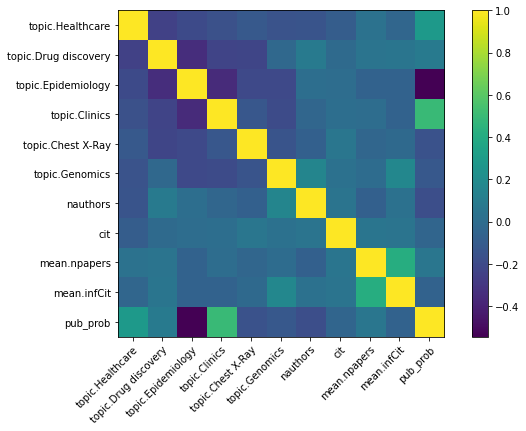

In [19]:
import matplotlib.pyplot as plt

ticks = ['topic.Healthcare', 'topic.Drug discovery', 'topic.Epidemiology', 'topic.Clinics', 'topic.Chest X-Ray', 'topic.Genomics',
       'nauthors', 'cit', 'mean.npapers', 'mean.infCit', 'pub_prob']
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
ax = fig.add_subplot(111)
cax = ax.matshow(X[ticks].corr())
fig.colorbar(cax)

ax.set_xticks(np.arange(len(ticks)))
ax.set_yticks(np.arange(len(ticks)))

ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)

ax.xaxis.set_ticks_position('bottom')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

<AxesSubplot:xlabel='topic'>

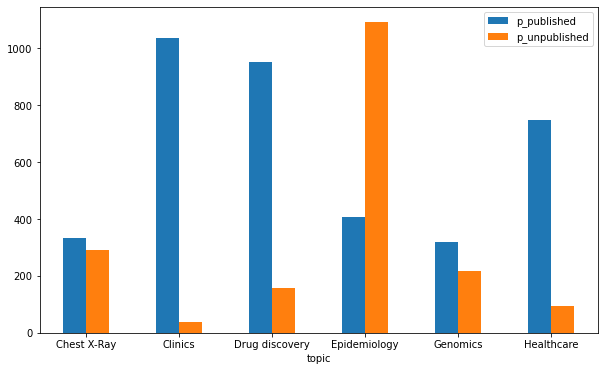

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

X['p_published'] = (X['pub_prob'] > 0.5) * 1
df_ret = pd.merge(X['topic'], X['p_published'], left_index=True, right_index=True)

topic_sum = df_ret.groupby('topic').agg({'topic':'count', 'p_published':'sum'})
topic_sum['p_unpublished'] = topic_sum['topic'] - topic_sum['p_published']
topic_sum[['p_published', 'p_unpublished']].plot.bar(rot=0)

<AxesSubplot:xlabel='topic'>

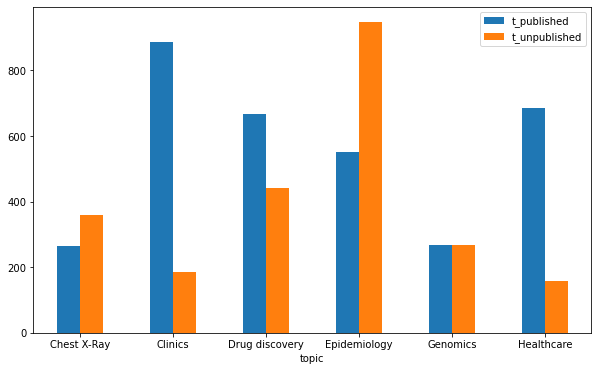

In [16]:
X['t_published'] = y * 1
df_t_ret = pd.merge(X['topic'], X['t_published'], left_index=True, right_index=True)

topic_t_sum = df_t_ret.groupby('topic').agg({'topic':'count', 't_published':'sum'})
topic_t_sum['t_unpublished'] = topic_t_sum['topic'] - topic_t_sum['t_published']
topic_t_sum[['t_published', 't_unpublished']].plot.bar(rot=0)